# Data Exploration

In [1]:
import json
import project_utilities as utils
from project_utilities import pd, np

import seaborn as sns
import matplotlib.pyplot as plt

file_name_data = 'proj1_data.json'

with open(file_name_data) as fp:
    data = json.load(fp)

## Pre-processing Data

In [2]:
X = utils.process_data(data)

## Split Data into Training, Validation, and Test Sets

In [3]:
X_train = X[0:10000]
X_validation = X[10000:11000]
X_test = X[11000:]

assert len(X_train) == 10000 , 'Expected 10000. Got %d' % len(X_train)
assert len(X_validation) == 1000 , 'Expected 1000. Got %d' % len(X_validation)
assert len(X_test) == 1000 , 'Expected 1000. Got %d' % len(X_test)

## Word Count Features

In [5]:
top_words_train = utils.get_top_words(X_train)
# top_words_validation = utils.get_top_words(X_validation)

assert len(top_words_train) == 160, 'Expected 160. Got %d' % len(top_words_train)
# assert len(top_words_validation) == 160, 'Expected 160. Got %d' % len(top_words_validation)

X_train = utils.insert_top_words_count(X_train, top_words_train)
X_validation = utils.insert_top_words_count(X_validation, top_words_train)

In [18]:
with open('words.txt', 'w') as fd:
    fd.write(' '.join(top_words_train))

## Convert to Pandas Dataframe for Ease of Handling

In [6]:
X_train = pd.DataFrame(X_train)
X_validation = pd.DataFrame(X_validation)

## New Features
New Feature #1: Children ^ 2<br>

In [7]:
# total_top_words = []
# for row in range(X_train.shape[0]):
#     col = X_train.iloc[row, 5:]
#     total_top_words.append(col.aggregate(func=np.sum))
    
# X_train['total_top_words'] = pd.Series(total_top_words)

In [8]:
X_train['children_square'] = X_train['children']**2

## Linear Regression

### Heat Map Correlation Matrix

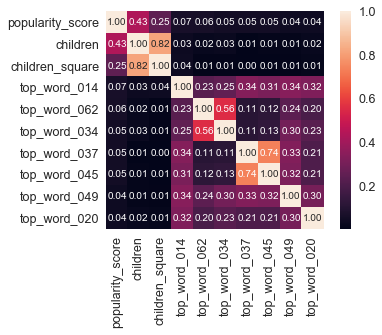

In [8]:
nb_top_corr = 10
cols = X_train.corr().nlargest(nb_top_corr, 'popularity_score')['popularity_score'].index
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

### Train Linear Regression Model

In [9]:
model = utils.LinearRegressionModel()

In [10]:
X_train['bias'] = pd.Series(np.ones(X_train.shape[0]), index=X_train.index)
y_train = X_train['popularity_score']
X_train.drop(columns=['text', 'popularity_score'], inplace=True)

In [11]:
model.fit(X_train.values, y_train.values, step_size=0.00001, decay_factor=5, error_threshold=0.0001, debug=True)

9.99893418421e-05
Time Elapsed: 10.913320 seconds


### Debug with Sklearn

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
predictions = reg.predict(X_validation)

In [ ]:
metrics.mean_squared_error(y_validation, predictions)

### Make Predictions

In [12]:
X_validation['bias'] = pd.Series(np.ones(X_validation.shape[0]), index=X_validation.index)
y_validation = X_validation['popularity_score'].values
X_validation.drop(columns=['text', 'popularity_score'], inplace=True)

X_validation['children_square'] = X_validation['children'].apply(func=np.square)

In [13]:
y_validation_preds = model.predict(X_validation)

In [14]:
MSE_validation = utils.mse(y_validation, y_validation_preds)
print(MSE_validation)

24.1443071617


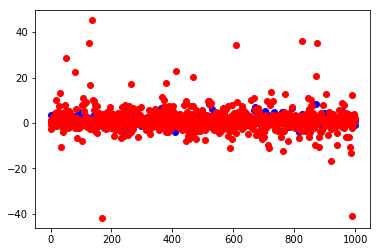

In [15]:
plt.plot(y_validation,"bo", y_validation_preds, 'ro')
plt.show()